In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv("(2).csv")
V_DS = [np.sort(np.array(df.iloc[:,2*x].dropna())) for x in range(7)]
I_D = [np.sort(np.array(df.iloc[:,2*x+1].dropna())) for x in range(7)]


In [30]:
df = pd.read_csv("(3).csv")
V_GS = [np.sort(np.array(df.iloc[:,2*x].dropna())) for x in range(4)]
V_DS_ = [np.sort(np.array(df.iloc[:,2*x+1].dropna())) for x in range(4)]
R_L = [1.985, 1.985, 9.95, 9.95]
V0 = [20.4,15,15,20.4]
I_D_ = [y/x - V_DS_[i]/x for x, y, i in zip(R_L,V0, range(4))]

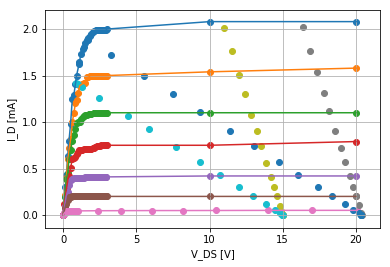

In [31]:
for i in range(7):    
    plt.scatter(V_DS[i], I_D[i], label="V_GS={}".format(-0.2*i))
    plt.plot(V_DS[i], I_D[i], label="V_GS={}".format(-0.2*i))
for i in range(4):
    plt.scatter(V_DS_[i], I_D_[i])
plt.xlabel("V_DS [V]")
plt.ylabel("I_D [mA]")
plt.grid(True)
#plt.legend()
#I=np.array([0,2])
#V = 20.4-1.985*I
#plt.plot(V,I)

In [44]:
V_GS = np.array(range(7))*(-0.2)
I_D_20 = np.array([x[-1] for x in I_D])

In [45]:
I_D_20

array([2.08  , 1.58  , 1.1   , 0.79  , 0.42  , 0.2   , 0.0502])

傾き:-1.8842857142857155, y切片:1.970476190476191


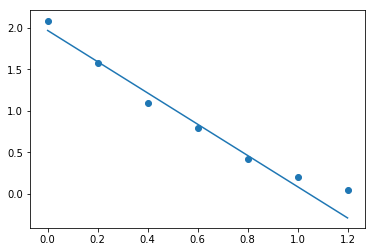

In [58]:
plt.scatter(-V_GS, I_D_20)
plt.plot(x,y)
print("傾き:{}, y切片:{}".format(lr.coef_[0][0], lr.intercept_[0]))

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(-V_GS[:-1].reshape(-1,1), I_D_20[:-1].reshape(-1,1))
x = np.array([0,1.2]).reshape(-1,1)
y = lr.predict(x)
lr_ = LinearRegression()
lr_.fit(-V_GS.reshape(-1,1), I_D_20.reshape(-1,1))
x_ = np.array([0,1.2]).reshape(-1,1)
y_ = lr_.predict(x_)

傾き:-1.8842857142857155, y切片:1.970476190476191 (V_DS=1.2Vを除く)
傾き:-1.7016785714285712, y切片:1.9096071428571426 (V_DS=1.2Vを含む)


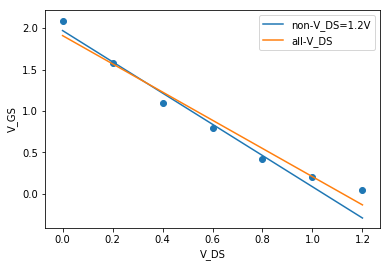

In [73]:
plt.scatter(-V_GS, I_D_20)
plt.plot(x,y, label="non-V_DS=1.2V")
plt.plot(x_,y_, label="all-V_DS")
plt.xlabel("V_DS")
plt.ylabel("V_GS")
plt.legend()
print("傾き:{}, y切片:{} (V_DS=1.2Vを除く)".format(lr.coef_[0][0], lr.intercept_[0]))
print("傾き:{}, y切片:{} (V_DS=1.2Vを含む)".format(lr_.coef_[0][0], lr_.intercept_[0]))

In [12]:
df.tail()

,V_DS_0,I_D_0,V_DS_1,I_D_1,V_DS_2,I_D_2,V_DS_3,I_D_3,V_DS_4,I_D_4,V_DS_5,I_D_5,V_DS_6,I_D_6,V_DS_7,I_D_7
29,2.900,1.99,2.90,1.50,2.900,1.1,2.900,0.75,2.900,0.41,2.929,0.2,8.16,0.0480,NaN,NaN
30,2.997,2.00,3.00,1.50,3.001,1.1,3.022,0.75,2.919,0.41,3.000,0.2,10.47,0.0486,NaN,NaN
31,10.010,2.08,20.02,1.58,10.000,1.1,10.000,0.75,10.000,0.42,20.000,0.2,13.96,0.0498,NaN,NaN
32,20.020,2.08,10.00,1.54,20.000,1.1,20.000,0.75,20.000,0.42,10.000,0.2,17.02,0.0500,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.10,0.0502,NaN,NaN
